In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
PATH = os.getcwd()
os.chdir("..")
PATH = os.path.abspath(os.curdir)

In [3]:
df = pd.read_csv(os.path.join(PATH, '04 - Data/Final Data/final_data_dummies.csv'))
df = df.drop(columns=['totalprod', 'priceperlb', 'prodvalue', 'stocks', 'nAllNeonic']) 

In [4]:
df

,year,numcol,yieldpercol,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,prevyear_nCLOTHIANIDIN,prevyear_nIMIDACLOPRID,...,StateName_Vermont,StateName_Virginia,StateName_Washington,StateName_West Virginia,StateName_Wisconsin,StateName_Wyoming,Region_Midwest,Region_Northeast,Region_South,Region_West
0,2007,11000.0,56,7696.2,3258.1,4149.6,0.0,0.0,680.000000,4230.200000,...,0,0,0,0,0,0,0,0,1,0
1,2006,11000.0,72,680.0,4230.2,5371.6,0.0,0.0,1503.600000,994.500000,...,0,0,0,0,0,0,0,0,1,0
2,2002,12000.0,86,0.0,1178.8,840.4,0.0,0.0,0.000000,1490.800000,...,0,0,0,0,0,0,0,0,1,0
3,2004,12000.0,87,2676.4,1323.9,3863.9,0.0,0.0,0.000000,668.300000,...,0,0,0,0,0,0,0,0,1,0
4,2005,13000.0,66,1503.6,994.5,5493.9,0.0,0.0,2676.400000,1323.900000,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,2016,40000.0,68,0.0,27.5,9.4,0.0,0.0,0.000000,114.400000,...,0,0,0,0,0,1,0,0,0,1
821,2007,43000.0,80,122.2,198.3,76.3,0.0,0.0,218.100000,31.900000,...,0,0,0,0,0,1,0,0,0,1
822,1998,46000.0,60,0.0,91.2,0.0,0.0,0.0,15391.831579,12671.921053,...,0,0,0,0,0,1,0,0,0,1
823,2013,47000.0,66,840.9,155.9,526.2,0.0,0.0,1174.900000,277.000000,...,0,0,0,0,0,1,0,0,0,1


In [5]:
# Set train and test set, test is anything beyond 2016
train = df[df['year'] < 2016]
test = df[df['year'] >= 2016]
X_train = train.drop(columns=['yieldpercol', 'year'])
y_train = train['yieldpercol']
X_test = test.drop(columns=['yieldpercol', 'year'])
y_test = test['yieldpercol']

# Normalize features
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler2 = StandardScaler()
scaler2.fit(X_test)
X_test = scaler2.transform(X_test)

df = df.drop(columns=['yieldpercol', 'year']) #so we can use df.columns to call feature names

# Ridge

In [6]:
model_ridge = Ridge()
coef = []
errors_train = []
errors_test = []

alphas = np.logspace(-5, 5, 200)
for a in alphas:
    model_ridge.set_params(alpha=a)
    model_ridge.fit(X_train, y_train)
    coef.append(model_ridge.coef_)
    errors_train.append(mean_squared_error(y_train,model_ridge.predict(X_train)))
    errors_test.append(mean_squared_error(y_test,model_ridge.predict(X_test)))

Best alpha:  10.718913192051286
Train MSE:  108.03952647889857
Test MSE:  160.16045376075255


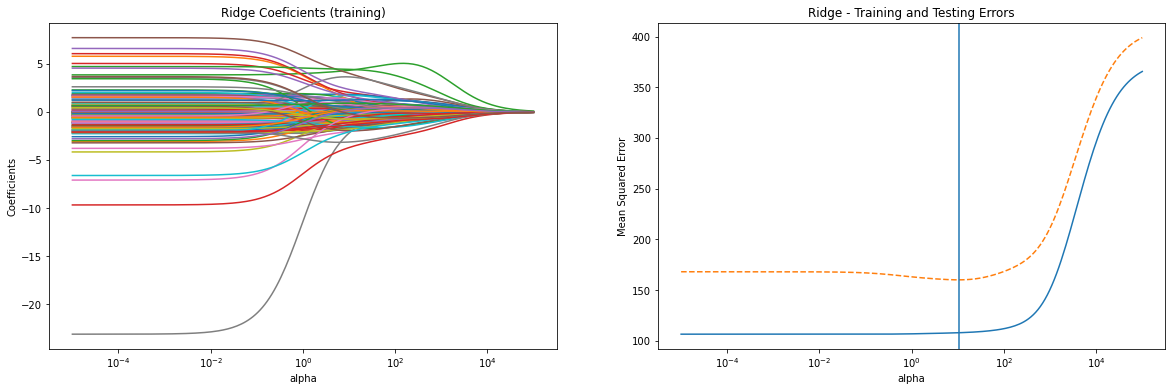

In [7]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coef)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Ridge Coeficients (training)')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors_train,linestyle="-", label="Train")
ax.plot(alphas, errors_test,linestyle="--", label="Test")
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean Squared Error')
plt.title('Ridge - Training and Testing Errors')
plt.axis('tight')

min_val_ridge = min(errors_test) #minimum cv
i = errors_test.index(min_val_ridge) #index of minimum cv
plt.axvline(alphas[i]) #corresponding alpha
print("Best alpha: ", alphas[i])
print("Train MSE: ", errors_train[i])
print("Test MSE: ", errors_test[i])

plt.show()

In [8]:
model_ridgeCV = RidgeCV(alphas = np.logspace(-5, 5, 200), cv=10).fit(X_train, y_train)

print("Ridge - Train R-squared: "+str(model_ridgeCV.score(X_train, y_train)))
print("Ridge - Test R-squared: "+str(model_ridgeCV.score(X_test, y_test)))
print("Ridge - Train MSE: "+str(mean_squared_error(y_train, model_ridgeCV.predict(X_train))))
print("Ridge - Test MSE: "+str(mean_squared_error(y_test, model_ridgeCV.predict(X_test))))
print("Ridge - best alpha: "+str(model_ridgeCV.alpha_))
print("Ridge - intercept: "+str(model_ridgeCV.intercept_))

Ridge - Train R-squared: 0.690588179400697
Ridge - Test R-squared: 0.5061976065641578
Ridge - Train MSE: 116.61132875293183
Ridge - Test MSE: 175.50200002453676
Ridge - best alpha: 217.11179456945052
Ridge - intercept: 60.92751677852349


In [9]:
for i in range(len(model_ridgeCV.coef_)):
  print(df.columns[i], model_ridgeCV.coef_[i])

numcol 1.139891274875191
nCLOTHIANIDIN 0.007459979336617682
nIMIDACLOPRID -0.7596813488593673
nTHIAMETHOXAM -0.20611800424494248
nACETAMIPRID -0.35477927466505416
nTHIACLOPRID -0.4232475946323258
prevyear_nCLOTHIANIDIN -0.5451389773769005
prevyear_nIMIDACLOPRID -0.4652031295952094
prevyear_nTHIAMETHOXAM 0.05347497303048949
prevyear_nACETAMIPRID -0.8483330409328254
prevyear_nTHIACLOPRID -0.4910524247765392
NorthDakota_PrevYear 0.4031794024661819
prevyearyield 5.025555747147026
avg_temp 1.2344266766270218
anomaly 0.7146961483183093
varroa -0.1920855778958449
spores 0.3361139294687083
cbpv_max 0.7466210373041605
dwv_max 0.0
iapv_max 0.34723836971726574
kbv_max 1.226462448126923
sbpv_max 0.0
abpv_max 0.31601533590473513
dwv-b_max -0.3688552343165616
lsv2_max -0.11586094994381242
mkv_max 0.0
cbpv_prob -0.24181755598768773
dwv_prob -0.39997492050246164
iapv_prob -0.12413625397420879
kbv_prob -0.0074999117738757835
sbpv_prob 0.0
abpv_prob 0.2498285443897353
dwv-b_prob -0.36885523431656253
lsv

# Lasso

In [10]:
model_lasso = Lasso(tol = 30)
coef = []
errors_train = []
errors_test = []

alphas = np.logspace(-5, 5, 200)
for a in alphas:
    model_lasso.set_params(alpha=a)
    model_lasso.fit(X_train, y_train)
    coef.append(model_lasso.coef_)
    errors_train.append(mean_squared_error(y_train,model_lasso.predict(X_train)))
    errors_test.append(mean_squared_error(y_test,model_lasso.predict(X_test)))

Best alpha:  0.8406652885618334
Train MSE:  148.65898272607288
Test MSE:  143.87815535463545


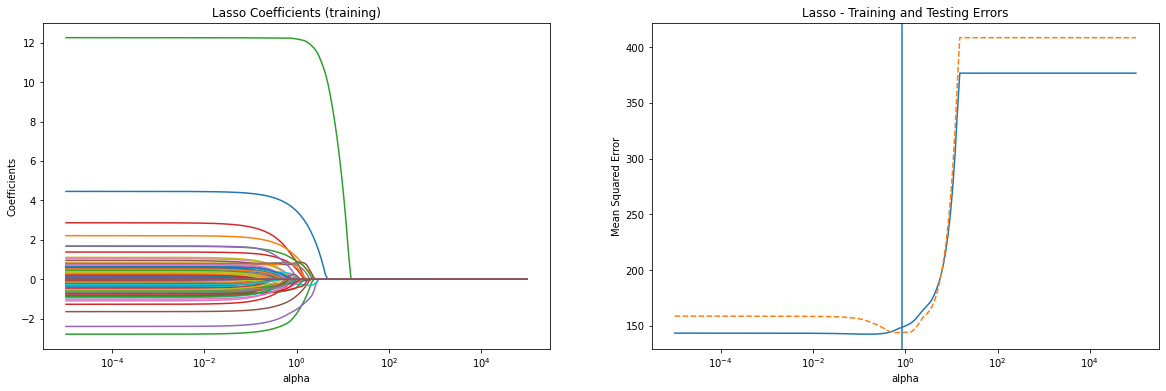

In [11]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coef)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Lasso Coefficients (training)')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors_train,linestyle="-", label="Train")
ax.plot(alphas, errors_test,linestyle="--", label="Test")
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean Squared Error')
plt.title('Lasso - Training and Testing Errors')
plt.axis('tight')

min_val_lasso = min(errors_test) #minimum cv
i = errors_test.index(min_val_lasso) #index of minimum cv
plt.axvline(alphas[i]) #corresponding alpha
print("Best alpha: ", alphas[i])
print("Train MSE: ", errors_train[i])
print("Test MSE: ", errors_test[i])

plt.show()

In [12]:
model_lassoCV= LassoCV(alphas = np.logspace(-5, 5, 200), cv=10, tol = 30).fit(X_train, y_train)

print("Lasso - Train R-squared: "+str(model_lassoCV.score(X_train, y_train)))
print("Lasso - Test R-squared: "+str(model_lassoCV.score(X_test, y_test)))
print("Lasso - Train MSE: "+str(mean_squared_error(y_train, model_lassoCV.predict(X_train))))
print("Lasso - Test MSE: "+str(mean_squared_error(y_test, model_lassoCV.predict(X_test))))
print("Lasso - best alpha: "+str(model_lassoCV.alpha_))
print("Lasso - intercept: "+str(model_lassoCV.intercept_))

Lasso - Train R-squared: 0.5852643332736387
Lasso - Test R-squared: 0.5827530720625214
Lasso - Train MSE: 156.30584857591907
Lasso - Test MSE: 148.29346987892933
Lasso - best alpha: 1.6831803533309584
Lasso - intercept: 60.92751677852349


In [13]:
for i in range(len(model_lassoCV.coef_)):
  print(df.columns[i], model_lassoCV.coef_[i])

numcol 2.776398788847135
nCLOTHIANIDIN -0.0
nIMIDACLOPRID -0.7779395822142872
nTHIAMETHOXAM 0.0
nACETAMIPRID -1.0972385525809338
nTHIACLOPRID -0.2564878506644893
prevyear_nCLOTHIANIDIN -0.0
prevyear_nIMIDACLOPRID -0.0
prevyear_nTHIAMETHOXAM 0.0
prevyear_nACETAMIPRID -0.29371985453806393
prevyear_nTHIACLOPRID -0.04237124614499151
NorthDakota_PrevYear 0.4920380330650339
prevyearyield 12.043641465439222
avg_temp 0.0
anomaly 0.0
varroa -0.0
spores 0.0
cbpv_max 0.0
dwv_max 0.0
iapv_max -0.0
kbv_max 0.0
sbpv_max 0.0
abpv_max 0.0
dwv-b_max -0.0
lsv2_max -0.0
mkv_max 0.0
cbpv_prob -0.0
dwv_prob -0.0
iapv_prob 0.0
kbv_prob 0.0
sbpv_prob 0.0
abpv_prob 0.0
dwv-b_prob -0.0
lsv2_prob 0.0
mkv_prob 0.0
prevyearspores 0.0
prevyearvarroa -0.0
urbanicity -0.0
Prev Days with AQI -0.0
Prev Good Days 0.0
Prev Moderate Days -0.0
Prev Unhealthy for Sensitive Groups Days -0.0
Prev Unhealthy Days -0.0
Prev Very Unhealthy Days -0.06603930871583606
Prev Hazardous Days -0.0
Prev Max AQI -0.0
Prev 90th Percentile 